In [6]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [25]:
def generate(N):
    x1 = np.random.uniform(1, 5, size=(N,))
    x2 = np.random.uniform(10,100, size=(N,))
    X = np.column_stack((x1, x2))
    i = random.randint(0,N/2-1)
    j = random.randint(N/2,N-1)
    slope = (x2[j]-x2[i])/(x1[j]-x1[i])
    intercept = x2[j]-x1[j]*slope
    return X, slope, intercept
    
def target_f(slope, intercept, x):
    return slope*x + intercept

def label_y(slope, intcpt, x1, x2):
    y = []
    for i, j in zip(x1, x2):
        if target_f(slope, intercept, i)>j:
            y.append(1)
        else:
            y.append(-1)
    return y

def flipper(y):
    for j in range(10):
        i = random.choice(range(len(y)))
        if y[i] == 1:
            y[i] = -1
        else:
            y[i] = 1
    return y

In [8]:
class Perceptron:
    def __init__(self, X):
        self.weights = np.zeros(shape=len(X[0])+1)
    
    def fit(self, X, y):
        T = 10
        while T>0:
            for i, x in enumerate(X):
                if self.predict(x, self.weights)!=y[i]:
                    x = np.insert(x, 0, 1)
                    self.weights = self.weights + y[i]*x
            T -= 1
        return self.weights
        
    def predict(self, x, w):
        return np.sign(np.dot(np.transpose(w[1:]),x) + w[0])
        

In [13]:
class Pocket:
    def __init__(self, X, y):
        self.N = len(y)
    
    def fit(self, X, y):
        weights_old = np.zeros(shape=len(X[0])+1)
        W, W_hat = [], []
        p = Perceptron(X)
        for t in range(1000):
            weights_new = p.fit(X, y)
            error_1 = self.error(X, y, weights_new)
            error_2 = self.error(X, y, weights_old)           
            if error_1 <= error_2:
                weights_old = weights_new
            W.append(weights_old), W_hat.append(weights_new)
        return W, W_hat
            
    def predict(self, x, w):
        return np.sign(np.dot(np.transpose(w[1:]),x) + w[0])

    def error(self, X, y, w):
        error = 0
        for i, x in enumerate(X):
            if self.predict(x, w)!=y[i]:
                error += + 1
        return error/len(y)               
        

In [26]:
err_train, err_test, err_train_hat, err_test_hat = np.zeros(shape=1000), np.zeros(shape=1000), np.zeros(shape=1000), np.zeros(shape=1000)
for i in range(20):
    error_train, error_test, error_train_hat, error_test_hat = [], [], [], []
    train = generate(100)
    x1, x2, X_train = train[0][:,0], train[0][:,1], train[0]
    slope, intercept = train[1], train[2]
    y_train = np.asarray(flipper(np.asarray(label_y(slope, intercept, x1, x2))))
    test = generate(1000)
    test_x1, test_x2 = test[0][:,0], test[0][:,1]
    X_test = test[0]
    y_test = np.asarray(flipper(np.asarray(label_y(slope, intercept, test_x1, test_x2))))
    pocket = Pocket(X, y_train)
    W, W_hat = pocket.fit(X_train, y_train)
    for w, w_hat in zip(W, W_hat):
        error_train.append(pocket.error(X_train, y_train, w)), error_train_hat.append(pocket.error(X_train, y_train, w_hat)) 
        error_test.append(pocket.error(X_test, y_test, w)), error_test_hat.append(pocket.error(X_test, y_test, w_hat)) 
    err_train += error_train
    err_test += error_test
    err_train_hat += error_train_hat
    err_test_hat += error_test_hat

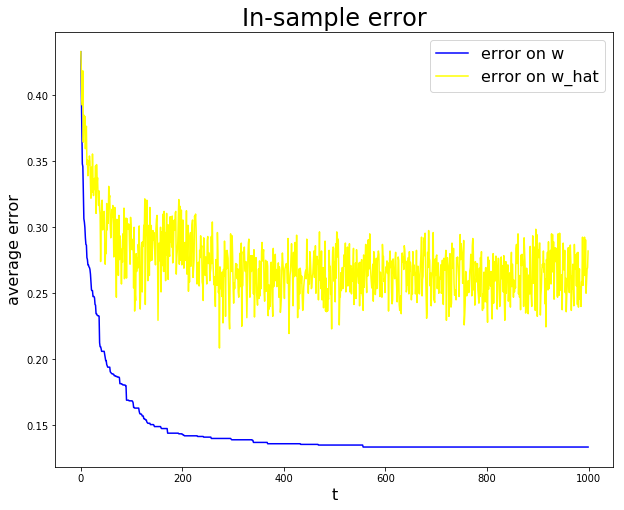

In [27]:
plt.figure(figsize=(10, 8));
plt.title('In-sample error', fontsize = 24)
plt.plot(np.arange(0, 1000), err_train/20, color='blue', label = 'error on w');
plt.plot(np.arange(0, 1000), err_train_hat/20, color='yellow', label = 'error on w_hat');
plt.xlabel(xlabel='t', fontsize=16)
plt.ylabel(ylabel='average error', fontsize=16)
plt.legend(fontsize=16)
plt.show()

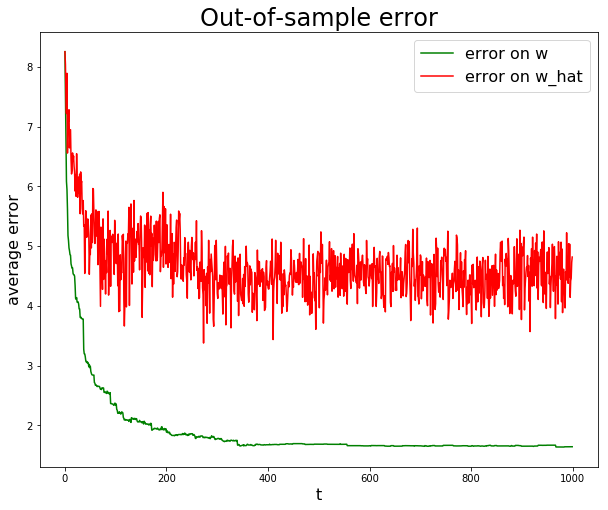

In [28]:
plt.figure(figsize=(10, 8));
plt.title('Out-of-sample error', fontsize = 24)
plt.plot(np.arange(0, 1000), err_test, color='green', label = 'error on w');
plt.plot(np.arange(0, 1000), err_test_hat, color='red', label = 'error on w_hat');
plt.xlabel(xlabel='t', fontsize=16)
plt.ylabel(ylabel='average error', fontsize=16)
plt.legend(fontsize=16)
plt.show()